In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import dust
import math
import random
import numpy as np

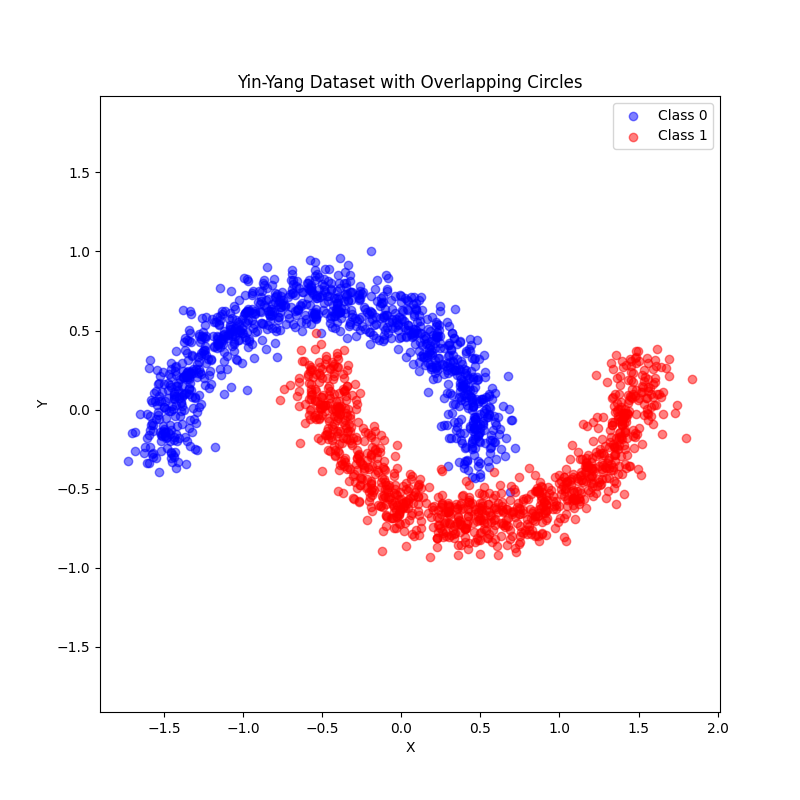

In [2]:
def generate_yin_yang_data(n_points=1000, radius=1.0, noise=0.1):
    # Half the points for each class
    n_half = n_points // 2
    
    # Generate random angles for points on each circle
    angles = np.pi * np.random.rand(n_half)
    
    # Class 0: Circle centered on the left
    x0 = radius * np.cos(angles) - 0.5 + noise * np.random.randn(n_half)
    y0 = radius * np.sin(angles) - 0.3 + noise * np.random.randn(n_half)
    
    # Class 1: Circle centered on the right
    x1 = radius * np.cos(angles + np.pi) + 0.5 + noise * np.random.randn(n_half)
    y1 = radius * np.sin(angles + np.pi) + 0.3 + noise * np.random.randn(n_half)
    
    # Combine the coordinates and create labels
    x = np.concatenate([x0, x1])
    y = np.concatenate([y0, y1])
    labels = np.array([0] * n_half + [1] * n_half)

    return x, y, labels

# Generate data
X, y, labels = generate_yin_yang_data(n_points=2000, radius=1.0, noise=0.1)

# Plot the data
plt.figure(figsize=(8, 8))
plt.scatter(X[labels == 0], y[labels == 0], color="blue", label="Class 0", alpha=0.5)
plt.scatter(X[labels == 1], y[labels == 1], color="red", label="Class 1", alpha=0.5)
plt.title("Yin-Yang Dataset with Overlapping Circles")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.legend()
plt.show()


In [3]:
x1 = [float(it) for it in X]
x2 = [float(it) for it in y]

x_train = list(zip(x1, x2))
y_train = [float(it) for it in labels]

In [4]:
mlp = dust.MLP(2, 1, [5, 5, 5, 5])
optimizer = dust.BaseOptimizer(mlp.params, lr=0.0001)
iters = 200
for i in range(iters):
    tot_loss = 0
    correct = 0
    tot = 0 
    for j in range(len(x_train)):
        x_val = x_train[j]
        y_true = y_train[j]
        y_pred = mlp(x_val)[0]
        y_pred = y_pred / 2 + 0.5
        tot += 1
        if abs(y_pred.val - y_true) < 0.5:
            correct += 1
        loss = dust.cross_entropy(y_true, y_pred)
        loss.backward()
        tot_loss += loss.val

    print("Epoch: {}   Acc: {}".format(i, correct / tot))
    optimizer.step()
    optimizer.zero_grad()

Epoch: 0   Acc: 0.7995
Epoch: 1   Acc: 0.806
Epoch: 2   Acc: 0.8105
Epoch: 3   Acc: 0.8155
Epoch: 4   Acc: 0.8185
Epoch: 5   Acc: 0.822
Epoch: 6   Acc: 0.8255
Epoch: 7   Acc: 0.8275
Epoch: 8   Acc: 0.8285
Epoch: 9   Acc: 0.8295
Epoch: 10   Acc: 0.8315
Epoch: 11   Acc: 0.8325
Epoch: 12   Acc: 0.834
Epoch: 13   Acc: 0.837
Epoch: 14   Acc: 0.8405
Epoch: 15   Acc: 0.841
Epoch: 16   Acc: 0.842
Epoch: 17   Acc: 0.8445
Epoch: 18   Acc: 0.8455
Epoch: 19   Acc: 0.848
Epoch: 20   Acc: 0.8495
Epoch: 21   Acc: 0.8505
Epoch: 22   Acc: 0.8505
Epoch: 23   Acc: 0.851
Epoch: 24   Acc: 0.852
Epoch: 25   Acc: 0.853
Epoch: 26   Acc: 0.853
Epoch: 27   Acc: 0.8525
Epoch: 28   Acc: 0.8525
Epoch: 29   Acc: 0.852
Epoch: 30   Acc: 0.852
Epoch: 31   Acc: 0.852
Epoch: 32   Acc: 0.852
Epoch: 33   Acc: 0.852
Epoch: 34   Acc: 0.8525
Epoch: 35   Acc: 0.8525
Epoch: 36   Acc: 0.852
Epoch: 37   Acc: 0.8515
Epoch: 38   Acc: 0.85
Epoch: 39   Acc: 0.8505
Epoch: 40   Acc: 0.85
Epoch: 41   Acc: 0.8505
Epoch: 42   Acc: 0.85
E

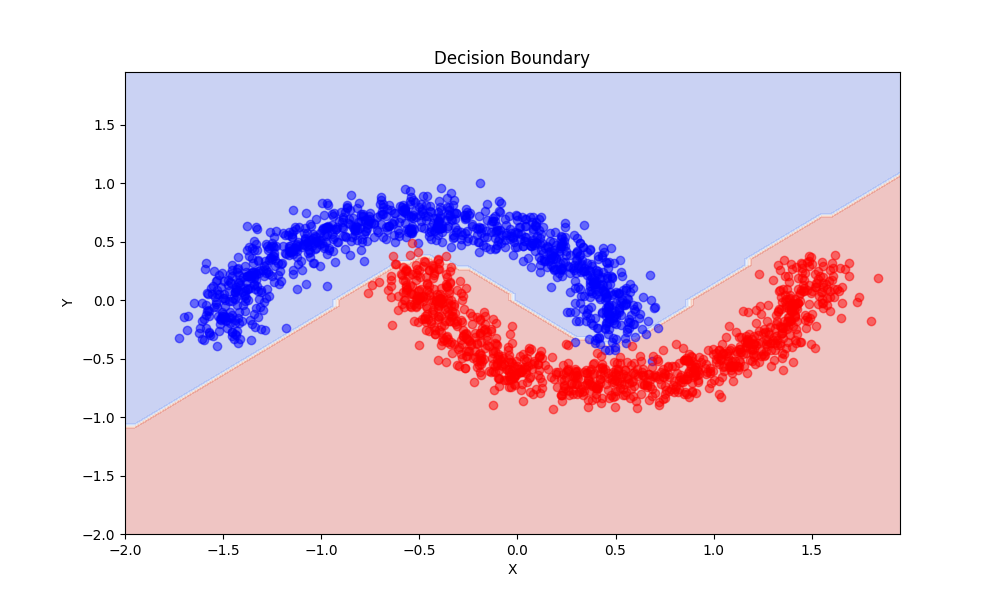

In [6]:
from itertools import product

# Define the range of x and y values
x_values = np.arange(-2, 2, 0.05)  # Example: x from 0 to 4
y_values = np.arange(-2, 2, 0.05)  # Example: x from 0 to 4
x_values = [float(it) for it in x_values]
y_values = [float(it) for it in y_values]

xx, yy = np.meshgrid(x_values, y_values)


# Create a list of (x, y) tuples
coordinates = list(product(x_values, y_values))
out = []
for point in coordinates:
    pred = mlp(point)[0].val
    pred = pred / 2 + 0.5
    out_curr = 0 if pred < 0.5 else 1
    out.append(out_curr)

out = np.array(out).reshape(xx.shape).T

# Plot the decision boundary
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

axs.contourf(xx, yy, out, alpha=0.3, cmap='coolwarm')
axs.scatter(X[labels == 0], y[labels == 0], color="blue", label="Class 0", alpha=0.5)
axs.scatter(X[labels == 1], y[labels == 1], color="red", label="Class 1", alpha=0.5)
axs.set_xlabel("X")
axs.set_ylabel("Y")
axs.set_title("Decision Boundary")
fig.savefig("Images/classification.jpg")